In [1]:
#https://www.sciencedirect.com/topics/computer-science/differential-evolution-algorithm
#https://www.mdpi.com/2076-3417/12/17/8392
#https://www.sciencedirect.com/science/article/abs/pii/S0952197623001926#:~:text=On%20average%20Differential%20Evolution%20algorithms%20clearly%20outperform%20Particle%20Swarm%20Optimization%20ones.
#https://sci-hub.se/https://link.springer.com/chapter/10.1007/BFb0020166

https://www.youtube.com/watch?v=o-OPrQmS1pU

In [22]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [4]:
# Data
data = pd.read_csv("dataset/preprocessedISPU.csv")

# Define features and target
X = data[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']]
Y = data[['categori']].values.ravel()

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
linearSVC = SVC(kernel="linear").fit(X_train, Y_train)

Y_SVC_pred = linearSVC.predict(X_test)
accuracy_linearSVC = accuracy_score(Y_test, Y_SVC_pred)

precision_linearSVC = precision_score(Y_test, Y_SVC_pred, average='macro')
recall_linearSVC = recall_score(Y_test, Y_SVC_pred, average='macro')
f1_linearSVC = f1_score(Y_test, Y_SVC_pred, average='macro')

print(f"Accuracy: {accuracy_linearSVC:.8f}")
print(f"Precision: {precision_linearSVC:.8f}")
print(f"Recall: {recall_linearSVC:.8f}")
print(f"F1 Score: {f1_linearSVC:.8f}")

Accuracy: 0.93164794
Precision: 0.90113087
Recall: 0.81889537
F1 Score: 0.85505368


In [6]:
rbfSVC = SVC(kernel="rbf").fit(X_train, Y_train)

Y_rbfSVC_pred = rbfSVC.predict(X_test)
accuracy_rbfSVC = accuracy_score(Y_test, Y_rbfSVC_pred)

precision_rbfSVC = precision_score(Y_test, Y_rbfSVC_pred, average='macro')
recall_rbfSVC = recall_score(Y_test, Y_rbfSVC_pred, average='macro')
f1_rbfSVC = f1_score(Y_test, Y_rbfSVC_pred, average='macro')

print(f"Accuracy: {accuracy_rbfSVC:.8f}")
print(f"Precision: {precision_rbfSVC:.8f}")
print(f"Recall: {recall_rbfSVC:.8f}")
print(f"F1 Score: {f1_rbfSVC:.8f}")

Accuracy: 0.95505618
Precision: 0.94815157
Recall: 0.86570508
F1 Score: 0.90293664


MODEL SETUP

In [7]:
import time
from scipy.optimize import differential_evolution
from pyswarm import pso

https://ieeexplore.ieee.org/abstract/document/6746403 -> Panduan buat setup cv, bounds, iteration, particle size

In [8]:
kernel = 'rbf' # objective dari paper

In [9]:
#https://link.springer.com/article/10.1007/s10666-017-9578-y
# kata paper itu, ten fold cross validation adalah metode yang bisa menghasilkan score paling optimal

def fitness_function(params):
    C, gamma = params
    svc = SVC(kernel=kernel, C=C, gamma=gamma)
    scores = cross_val_score(svc, X_train, Y_train, cv=10, scoring='accuracy')
    return -np.mean(scores)

In [10]:
# https://link.springer.com/article/10.1007/s10666-017-9578-y
# kata paper itu, bates nya (10^-6, 10^2)

de_bounds = [(1e-6, 1e2), (1e-6, 1e2)]
pso_lb = [1e-6, 1e-6]
pso_ub = [1e2, 1e2]

max_iteration = 100
particle_size = 100

DIFFERENTIAL EVOLUTION

In [11]:
start_time = time.time()
result = differential_evolution(
    fitness_function,
    de_bounds, 
    strategy='best1bin', 
    maxiter=max_iteration, 
    popsize=particle_size,
    init='random',
    disp=True
    )
best_params = result.x
best_score = result.fun
C_de_best1bin = best_params[0]
gamma_de_best1bin = best_params[1]

DE_SVC = SVC(kernel=kernel, C=C_de_best1bin, gamma=gamma_de_best1bin).fit(X_train, Y_train)
Y_DE_best1bin_SVC_pred = DE_SVC.predict(X_test)
accuracy_DE_best1bin_SVC = accuracy_score(Y_test, Y_DE_best1bin_SVC_pred)

end_time = time.time()
elapsed_time_de_best1bin = end_time - start_time

differential_evolution step 1: f(x)= -0.978330923694779
differential_evolution step 2: f(x)= -0.9787325301204819
differential_evolution step 3: f(x)= -0.9799357429718875
differential_evolution step 4: f(x)= -0.9799357429718875
differential_evolution step 5: f(x)= -0.9799357429718875
Polishing solution with 'L-BFGS-B'


In [12]:
start_time = time.time()
result = differential_evolution(
    fitness_function,
    de_bounds, 
    strategy='rand1bin', 
    maxiter=max_iteration, 
    popsize=particle_size,
    init='random',
    disp=True
    )
best_params = result.x
best_score = result.fun
C_de_rand1bin = best_params[0]
gamma_de_rand1bin = best_params[1]

DE_SVC = SVC(kernel=kernel, C=C_de_rand1bin, gamma=gamma_de_rand1bin).fit(X_train, Y_train)
Y_DE_rand1bin_SVC_pred = DE_SVC.predict(X_test)
accuracy_DE_rand1bin_SVC = accuracy_score(Y_test, Y_DE_rand1bin_SVC_pred)

end_time = time.time()
elapsed_time_de_rand1bin = end_time - start_time

differential_evolution step 1: f(x)= -0.9767228915662651
differential_evolution step 2: f(x)= -0.9771277108433735
differential_evolution step 3: f(x)= -0.9803373493975902
differential_evolution step 4: f(x)= -0.9803373493975902
differential_evolution step 5: f(x)= -0.9803373493975902
Polishing solution with 'L-BFGS-B'


In [13]:
print(f"C: {C_de_best1bin}")
print(f"gamma: {gamma_de_best1bin}\n")

precision_de_best1bin = precision_score(Y_test, Y_DE_best1bin_SVC_pred, average='macro')
recall_de_best1bin = recall_score(Y_test, Y_DE_best1bin_SVC_pred, average='macro')
f1_de_best1bin = f1_score(Y_test, Y_DE_best1bin_SVC_pred, average='macro')

print(f"Accuracy: {accuracy_DE_best1bin_SVC:.8f}")
print(f"Precision: {precision_de_best1bin:.8f}")
print(f"Recall: {recall_de_best1bin:.8f}")
print(f"F1 Score: {f1_de_best1bin:.8f}")
print(f"Time Elapsed: {elapsed_time_de_best1bin:.8f} second(s)\n")

C: 92.27085003040509
gamma: 1.427879542198717

Accuracy: 0.97659176
Precision: 0.95910833
Recall: 0.94537782
F1 Score: 0.95214026
Time Elapsed: 1163.22066927 second(s)



In [14]:
print(f"C: {C_de_rand1bin}")
print(f"gamma: {gamma_de_rand1bin}\n")

precision_de_rand1bin = precision_score(Y_test, Y_DE_rand1bin_SVC_pred, average='macro')
recall_de_rand1bin = recall_score(Y_test, Y_DE_rand1bin_SVC_pred, average='macro')
f1_de_rand1bin = f1_score(Y_test, Y_DE_rand1bin_SVC_pred, average='macro')

print(f"Accuracy: {accuracy_DE_rand1bin_SVC:.8f}")
print(f"Precision: {precision_de_rand1bin:.8f}")
print(f"Recall: {recall_de_rand1bin:.8f}")
print(f"F1 Score: {f1_de_rand1bin:.8f}")
print(f"Time Elapsed: {elapsed_time_de_rand1bin:.8f} second(s)\n")

C: 84.48051630169033
gamma: 1.2403037356691726

Accuracy: 0.97471910
Precision: 0.95766403
Recall: 0.93843338
F1 Score: 0.94784304
Time Elapsed: 1262.96474624 second(s)



In [15]:
start_time = time.time()
best_params, _ = pso(
    fitness_function,
    lb=pso_lb, 
    ub=pso_ub, 
    maxiter=max_iteration, 
    swarmsize=particle_size,
    )

C_pso, gamma_pso = best_params

PSO_SVC = SVC(kernel=kernel, C=C_pso, gamma=gamma_pso).fit(X_train, Y_train)
Y_PSO_SVC_pred = PSO_SVC.predict(X_test)
accuracy_PSO_SVC = accuracy_score(Y_test, Y_PSO_SVC_pred)

end_time = time.time()
elapsed_time_pso = end_time - start_time

Stopping search: maximum iterations reached --> 100


In [16]:
print(f"C: {C_pso}")
print(f"gamma: {gamma_pso}\n")

precision_pso = precision_score(Y_test, Y_PSO_SVC_pred, average='macro')
recall_pso = recall_score(Y_test, Y_PSO_SVC_pred, average='macro')
f1_pso = f1_score(Y_test, Y_PSO_SVC_pred, average='macro')

print(f"Accuracy: {accuracy_PSO_SVC:.8f}")
print(f"Precision: {precision_pso:.8f}")
print(f"Recall: {recall_pso:.8f}")
print(f"F1 Score: {f1_pso:.8f}")
print(f"Time Elapsed: {elapsed_time_pso:.8f} second(s)\n")

C: 100.0
gamma: 1.4027624629944484

Accuracy: 0.97471910
Precision: 0.95281557
Recall: 0.94460800
F1 Score: 0.94864375
Time Elapsed: 3335.94268703 second(s)



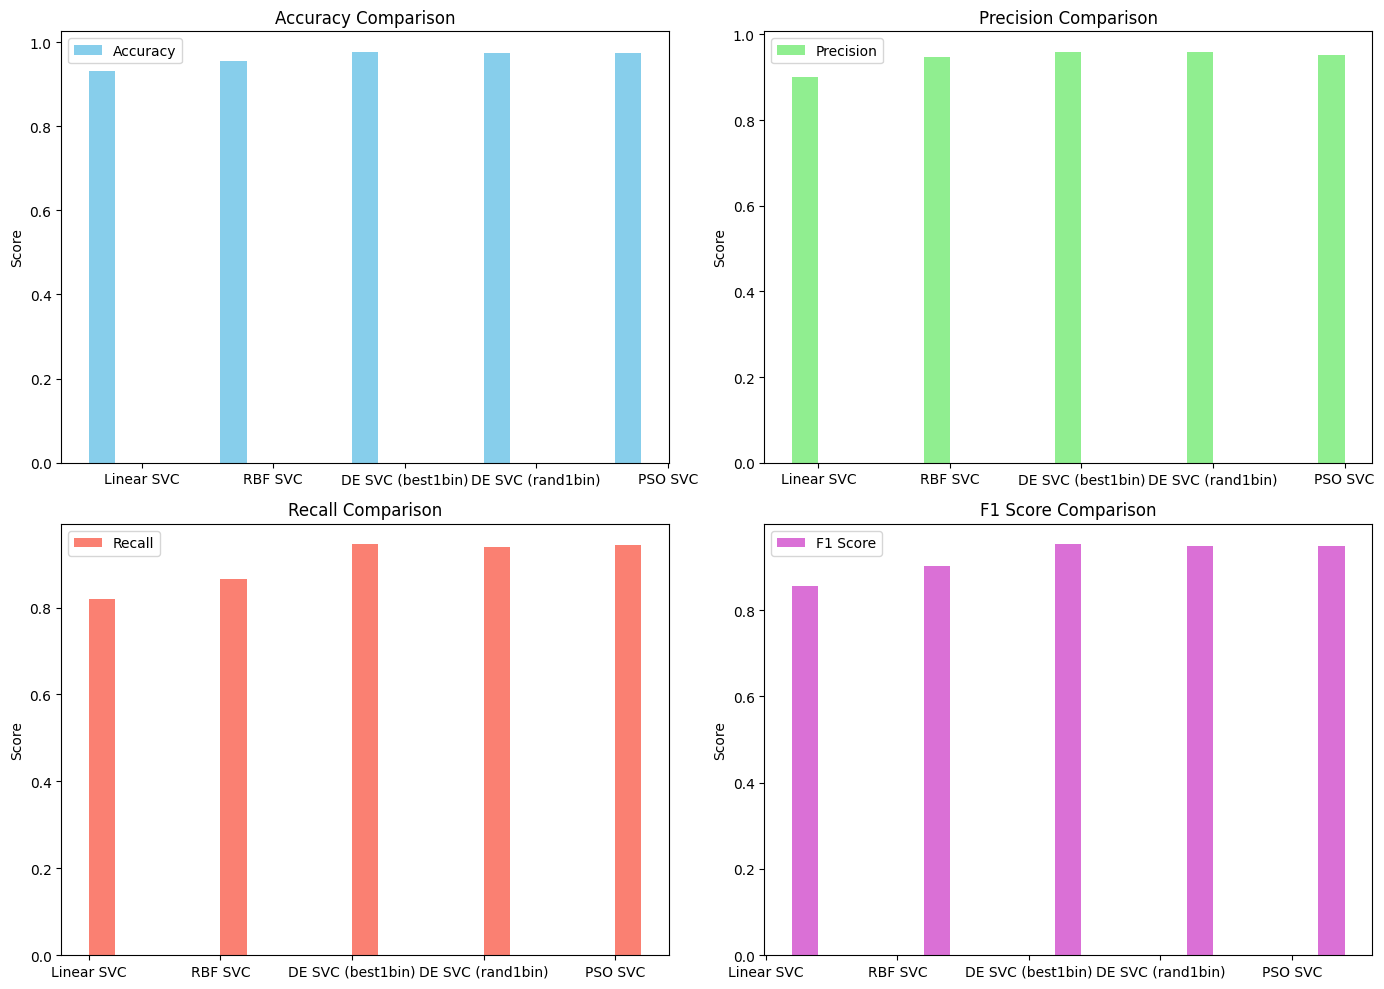

In [19]:
# Metrics for different classifiers
classifiers = ['Linear SVC', 'RBF SVC', 'DE SVC (best1bin)', 'DE SVC (rand1bin)', 'PSO SVC']

# Metrics values (example values; replace with your actual metrics)
accuracies = [accuracy_linearSVC, accuracy_rbfSVC, accuracy_DE_best1bin_SVC, accuracy_DE_rand1bin_SVC, accuracy_PSO_SVC]
precisions = [precision_linearSVC, precision_rbfSVC, precision_de_best1bin, precision_de_rand1bin, precision_pso]
recalls = [recall_linearSVC, recall_rbfSVC, recall_de_best1bin, recall_de_rand1bin, recall_pso]
f1_scores = [f1_linearSVC, f1_rbfSVC, f1_de_best1bin, f1_de_rand1bin, f1_pso]

# X-axis locations
x = np.arange(len(classifiers))
width = 0.2  # width of the bars

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot accuracy
ax[0, 0].bar(x - 1.5*width, accuracies, width, label='Accuracy', color='skyblue')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(classifiers)
ax[0, 0].set_title('Accuracy Comparison')
ax[0, 0].set_ylabel('Score')
ax[0, 0].legend()

# Plot precision
ax[0, 1].bar(x - 0.5*width, precisions, width, label='Precision', color='lightgreen')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(classifiers)
ax[0, 1].set_title('Precision Comparison')
ax[0, 1].set_ylabel('Score')
ax[0, 1].legend()

# Plot recall
ax[1, 0].bar(x + 0.5*width, recalls, width, label='Recall', color='salmon')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(classifiers)
ax[1, 0].set_title('Recall Comparison')
ax[1, 0].set_ylabel('Score')
ax[1, 0].legend()

# Plot F1 score
ax[1, 1].bar(x + 1.5*width, f1_scores, width, label='F1 Score', color='orchid')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(classifiers)
ax[1, 1].set_title('F1 Score Comparison')
ax[1, 1].set_ylabel('Score')
ax[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

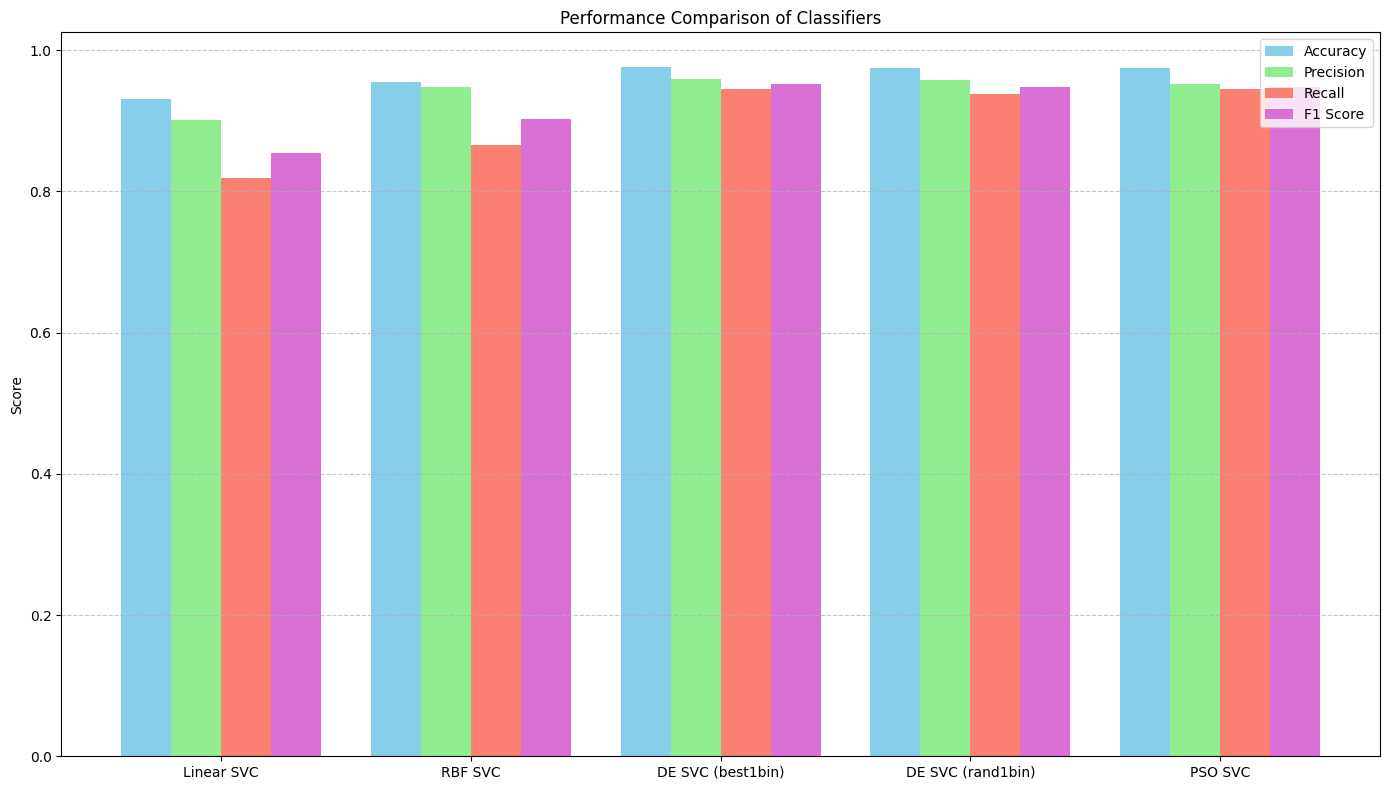

In [20]:
# X-axis locations
x = np.arange(len(classifiers))
width = 0.2  # width of the bars

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot all metrics
bars1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x - 0.5*width, precisions, width, label='Precision', color='lightgreen')
bars3 = ax.bar(x + 0.5*width, recalls, width, label='Recall', color='salmon')
bars4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1 Score', color='orchid')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.set_title('Performance Comparison of Classifiers')
ax.set_ylabel('Score')
ax.legend()

# Add a grid for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

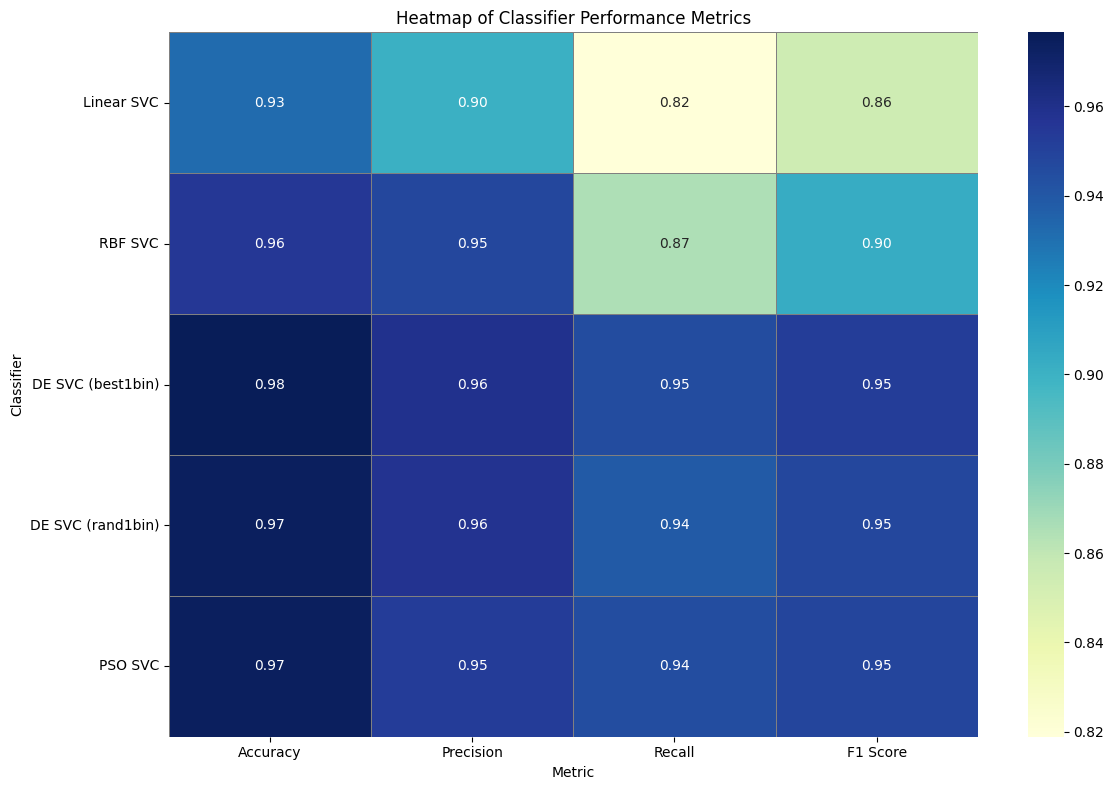

In [23]:
# Metrics values (example values; replace with your actual metrics)
metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
}

# Create a DataFrame
df = pd.DataFrame(metrics, index=classifiers)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, linecolor='gray')

# Add titles and labels
plt.title('Heatmap of Classifier Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Classifier')

# Show plot
plt.tight_layout()
plt.show()